In [1]:
!ls

htop-1.0.3  htop-1.0.3.tar.gz  Test.ipynb


In [2]:
!python --version

Python 3.5.3 :: Intel Corporation


In [4]:
import platform
import os

if 'c001' in platform.node(): 
    # platform.node() => 'c001' or like 'c001-n030' on Colfax
    abspath_dataset_dir_train_1 = '/data/kaggle/train/Type_1'
    abspath_dataset_dir_train_2 = '/data/kaggle/train/Type_2'
    abspath_dataset_dir_train_3 = '/data/kaggle/train/Type_3'
    abspath_dataset_dir_test    = '/data/kaggle/test/'
    abspath_dataset_dir_add_1   = '/data/kaggle/additional/Type_1'
    abspath_dataset_dir_add_2   = '/data/kaggle/additional/Type_2'
    abspath_dataset_dir_add_3   = '/data/kaggle/additional/Type_3'
elif '.local' in platform.node():
    # platform.node() => '*.local' on my local MacBook Air
    abspath_dataset_dir_train_1 = '/abspath/to/train/Type_1'
    abspath_dataset_dir_train_2 = '/abspath/to/train/Type_2'
    abspath_dataset_dir_train_3 = '/abspath/to/train/Type_3'
    abspath_dataset_dir_test    = '/abspath/to/test/'
    abspath_dataset_dir_add_1   = '/abspath/to/additional/Type_1'
    abspath_dataset_dir_add_2   = '/abspath/to/additional/Type_2'
    abspath_dataset_dir_add_3   = '/abspath/to/additional/Type_3'
else:
    # For kaggle's kernels environment (docker container?)
    abspath_dataset_dir_train_1 = '/kaggle/input/train/Type_1'
    abspath_dataset_dir_train_2 = '/kaggle/input/train/Type_2'
    abspath_dataset_dir_train_3 = '/kaggle/input/train/Type_3'
    abspath_dataset_dir_test    = '/kaggle/input/test/'
    abspath_dataset_dir_add_1   = '/kaggle/input/additional/Type_1'
    abspath_dataset_dir_add_2   = '/kaggle/input/additional/Type_2'
    abspath_dataset_dir_add_3   = '/kaggle/input/additional/Type_3'

    
def get_list_abspath_img(abspath_dataset_dir):
    list_abspath_img = []
    for str_name_file_or_dir in os.listdir(abspath_dataset_dir):
        if ('.jpg' in str_name_file_or_dir) == True:
            list_abspath_img.append(os.path.join(abspath_dataset_dir, str_name_file_or_dir))
    list_abspath_img.sort()
    return list_abspath_img


list_abspath_img_train_1 = get_list_abspath_img(abspath_dataset_dir_train_1)
list_abspath_img_train_2 = get_list_abspath_img(abspath_dataset_dir_train_2)
list_abspath_img_train_3 = get_list_abspath_img(abspath_dataset_dir_train_3)
list_abspath_img_train   = list_abspath_img_train_1 + list_abspath_img_train_2 + list_abspath_img_train_3

list_abspath_img_test    = get_list_abspath_img(abspath_dataset_dir_test)

list_abspath_img_add_1   = get_list_abspath_img(abspath_dataset_dir_add_1)
list_abspath_img_add_2   = get_list_abspath_img(abspath_dataset_dir_add_2)
list_abspath_img_add_3   = get_list_abspath_img(abspath_dataset_dir_add_3)
list_abspath_img_add     = list_abspath_img_add_1   + list_abspath_img_add_2   + list_abspath_img_add_3

# 0: Type_1, 1: Type_2, 2: Type_3
list_answer_train        = [0] * len(list_abspath_img_train_1) + [1] * len(list_abspath_img_train_2) + [2] * len(list_abspath_img_train_3)
list_answer_add          = [0] * len(list_abspath_img_add_1) + [1] * len(list_abspath_img_add_2) + [2] * len(list_abspath_img_add_3)

In [5]:
print(list_abspath_img_train_1[0:2])
print(list_abspath_img_train_2[0:2])
print(list_abspath_img_train_3[0:2])
print(list_abspath_img_train[0:4])
print(list_abspath_img_test[0:3])
print(list_abspath_img_add_1[0:2])
print(list_abspath_img_add_2[0:2])
print(list_abspath_img_add_3[0:2])
print(list_abspath_img_add[0:4])

['/data/kaggle/train/Type_1/0.jpg', '/data/kaggle/train/Type_1/10.jpg']
['/data/kaggle/train/Type_2/1.jpg', '/data/kaggle/train/Type_2/100.jpg']
['/data/kaggle/train/Type_3/1000.jpg', '/data/kaggle/train/Type_3/1003.jpg']
['/data/kaggle/train/Type_1/0.jpg', '/data/kaggle/train/Type_1/10.jpg', '/data/kaggle/train/Type_1/1013.jpg', '/data/kaggle/train/Type_1/1014.jpg']
['/data/kaggle/test/0.jpg', '/data/kaggle/test/1.jpg', '/data/kaggle/test/10.jpg']
['/data/kaggle/additional/Type_1/1000.jpg', '/data/kaggle/additional/Type_1/1003.jpg']
['/data/kaggle/additional/Type_2/0.jpg', '/data/kaggle/additional/Type_2/1.jpg']
['/data/kaggle/additional/Type_3/100.jpg', '/data/kaggle/additional/Type_3/1002.jpg']
['/data/kaggle/additional/Type_1/1000.jpg', '/data/kaggle/additional/Type_1/1003.jpg', '/data/kaggle/additional/Type_1/1009.jpg', '/data/kaggle/additional/Type_1/101.jpg']


In [6]:
import pandas


pandas_columns = ['Number of image files']
pandas_index   = ['train_1', 'train_2', 'train_3', 'train', 'test', 'add_1', 'add_2', 'add_3', 'add', 'train + add', 'total']
pandas_data    = [len(list_abspath_img_train_1),
                  len(list_abspath_img_train_2),
                  len(list_abspath_img_train_3),
                  len(list_abspath_img_train),
                  len(list_abspath_img_test),
                  len(list_abspath_img_add_1),
                  len(list_abspath_img_add_2), 
                  len(list_abspath_img_add_3), 
                  len(list_abspath_img_add),
                  len(list_abspath_img_train) + len(list_abspath_img_add),
                  len(list_abspath_img_train) + len(list_abspath_img_test) + len(list_abspath_img_add)]

pandas.DataFrame(pandas_data, index = pandas_index, columns = pandas_columns)

,Number of image files
train_1,250
train_2,781
train_3,450
train,1481
test,512
add_1,1192
add_2,3619
add_3,2113
add,6924
train + add,8405


In [9]:
# import cv2


# abspath_output_csv = './check_img_shape.csv'

# file_output_csv = open(abspath_output_csv, 'w')
# file_output_csv.write('abspath,shape_1,shape_2,shape_3\n')
# file_output_csv.close()

# for abspath_img in (list_abspath_img_train + list_abspath_img_test):
#     str_shape = str(cv2.imread(abspath_img).shape)
#     str_shape = str_shape.replace('(', '').replace(')', '').replace(' ', '')
#     file_output_csv = open(abspath_output_csv, 'a')
#     file_output_csv.write('%s,%s\n' % (abspath_img, str_shape))
#     file_output_csv.close()

# '''
# It will spend a lot of time to run. So I comment-out in the kernel notebook.
# I uploaded './check_img_shape.csv' on Google Drive.
# '''

# "https://drive.google.com/open?id=0B2kJp7wSl9SIZTgtOWlTSmtDT2s"

In [7]:
import cv2
import matplotlib.pyplot

def sub_func_load_img(abspath_img):
    img_rgb = cv2.cvtColor(cv2.imread(abspath_img), cv2.COLOR_BGR2RGB)
    return img_rgb

def show_img(abspath_img):
    matplotlib.pyplot.imshow(sub_func_load_img(abspath_img))
    matplotlib.pyplot.show()

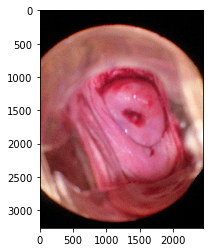

In [8]:
show_img(list_abspath_img_train[0])

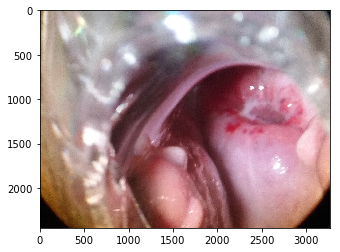

In [12]:
# Another Usage, using string of image file's path

if 'c001' in platform.node():
    abspath_img = '/data/kaggle/test/81.jpg' # on Colfax Cluster
else:
    abspath_img = '../input/test/81.jpg' # on Kaggle's Kernel

show_img(abspath_img)

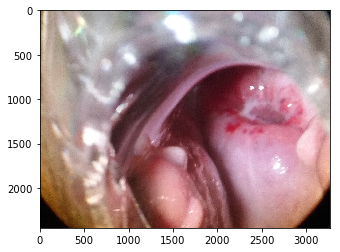

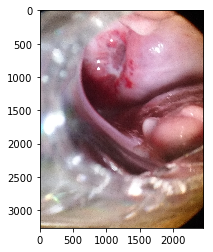

In [9]:
import numpy


def sub_func_rotate_img_if_need(img_rgb):
    if img_rgb.shape[0] >= img_rgb.shape[1]:
        return img_rgb
    else:
        return numpy.rot90(img_rgb)



if 'c001' in platform.node():
    abspath_img = '/data/kaggle/test/81.jpg' # on Colfax Cluster
else:
    abspath_img = '../input/test/81.jpg' # on Kaggle Kernel

    
img_rgb = sub_func_load_img(abspath_img)

matplotlib.pyplot.imshow(img_rgb)
matplotlib.pyplot.show()

matplotlib.pyplot.imshow(sub_func_rotate_img_if_need(img_rgb))
matplotlib.pyplot.show()

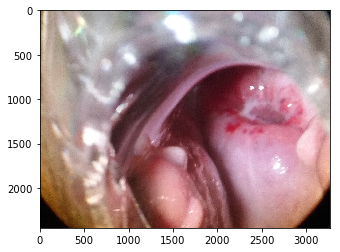

(2448, 3264, 3)


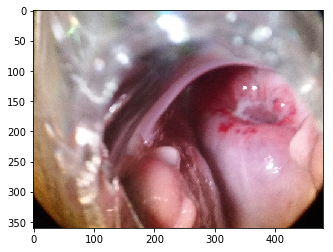

(360, 480, 3)


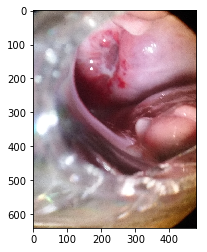

(640, 480, 3)


In [12]:
def sub_func_resize_img_same_ratio(img_rgb):
    if img_rgb.shape[0] / 640.0 >= img_rgb.shape[1] / 480.0:
        img_resized_rgb = cv2.resize(img_rgb, (int(640.0 * img_rgb.shape[1] / img_rgb.shape[0]), 640)) # (640, *, 3)
    else:
        img_resized_rgb = cv2.resize(img_rgb, (480, int(480.0 * img_rgb.shape[0] / img_rgb.shape[1]))) # (*, 480, 3)
    return img_resized_rgb


if 'c001' in platform.node():
    abspath_img = '/data/kaggle/test/81.jpg' # on Colfax Cluster
else:
    abspath_img = '../input/test/81.jpg' # on Kaggle Kernel

    
img_rgb = sub_func_load_img(abspath_img)

matplotlib.pyplot.imshow(img_rgb)
matplotlib.pyplot.show()
print(img_rgb.shape)

matplotlib.pyplot.imshow(sub_func_resize_img_same_ratio(img_rgb))
matplotlib.pyplot.show()
print(sub_func_resize_img_same_ratio(img_rgb).shape)

# Step 0 + Step 1 -> (*, 480, 3), Accidentally this example -> (640 ,480, 3)
matplotlib.pyplot.imshow(sub_func_resize_img_same_ratio(sub_func_rotate_img_if_need(img_rgb)))
matplotlib.pyplot.show()
print(sub_func_resize_img_same_ratio(sub_func_rotate_img_if_need(img_rgb)).shape)

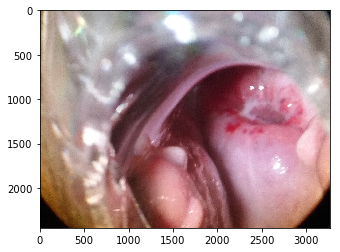

(2448, 3264, 3)


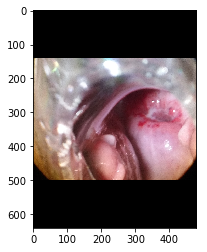

(640, 480, 3)


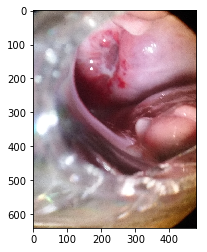

(640, 480, 3)


In [13]:
def sub_func_fill_img(img_rgb):
    if img_rgb.shape[0] == 640:
        int_resize_1    = img_rgb.shape[1]
        int_fill_1      = (480 - int_resize_1 ) // 2
        int_fill_2      =  480 - int_resize_1 - int_fill_1
        numpy_fill_1    =  numpy.zeros((640, int_fill_1, 3), dtype=numpy.uint8)
        numpy_fill_2    =  numpy.zeros((640, int_fill_2, 3), dtype=numpy.uint8)
        img_filled_rgb = numpy.concatenate((numpy_fill_1, img_rgb, numpy_fill_1), axis=1)
    elif img_rgb.shape[1] == 480:
        int_resize_0    = img_rgb.shape[0]
        int_fill_1      = (640 - int_resize_0 ) // 2
        int_fill_2      =  640 - int_resize_0 - int_fill_1
        numpy_fill_1 =  numpy.zeros((int_fill_1, 480, 3), dtype=numpy.uint8)
        numpy_fill_2 =  numpy.zeros((int_fill_2, 480, 3), dtype=numpy.uint8)
        img_filled_rgb = numpy.concatenate((numpy_fill_1, img_rgb, numpy_fill_1), axis=0)
    else:
        raise ValueError
    return img_filled_rgb


matplotlib.pyplot.imshow(img_rgb)
matplotlib.pyplot.show()
print(img_rgb.shape)

# Step 1 + Step 2
matplotlib.pyplot.imshow(sub_func_fill_img(sub_func_resize_img_same_ratio(img_rgb)))
matplotlib.pyplot.show()
print(sub_func_fill_img(sub_func_resize_img_same_ratio(img_rgb)).shape)


# Step 0 + Step 1 + Step 2
matplotlib.pyplot.imshow(sub_func_fill_img(sub_func_resize_img_same_ratio(sub_func_rotate_img_if_need(img_rgb))))
matplotlib.pyplot.show()
print(sub_func_fill_img(sub_func_resize_img_same_ratio(sub_func_rotate_img_if_need(img_rgb))).shape)

In [14]:
def sub_func_resample_img(abspath_img):
    img = sub_func_load_img(abspath_img)
    img = sub_func_rotate_img_if_need(img)
    img = sub_func_resize_img_same_ratio(img)
    img = sub_func_fill_img(img)
    return img

def show_resample_img(abspath_img):
    matplotlib.pyplot.imshow(sub_func_resample_img(abspath_img))
    matplotlib.pyplot.show()

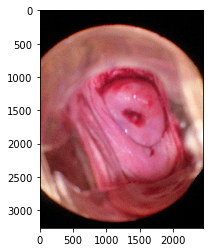

(3264, 2448, 3)


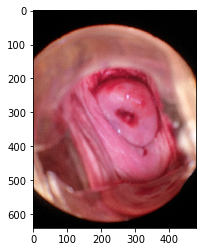

(640, 480, 3)


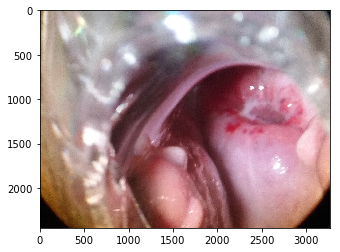

(2448, 3264, 3)


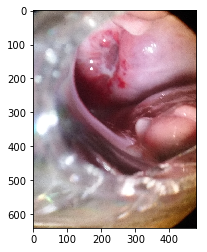

(640, 480, 3)


In [15]:
show_img(list_abspath_img_train[0])
print(sub_func_load_img(list_abspath_img_train[0]).shape)

show_resample_img(list_abspath_img_train[0])
print(sub_func_resample_img(list_abspath_img_train[0]).shape)

if 'c001' in platform.node():
    abspath_img = '/data/kaggle/test/81.jpg' # on Colfax Cluster
else:
    abspath_img = '../input/test/81.jpg' # on Kaggle Kernel

show_img(abspath_img)
print(sub_func_load_img(abspath_img).shape)

show_resample_img(abspath_img)
print(sub_func_resample_img(abspath_img).shape)

In [17]:
multiprocessing.cpu_count()

8

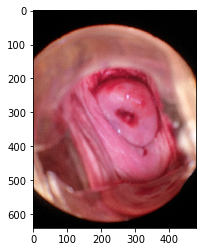

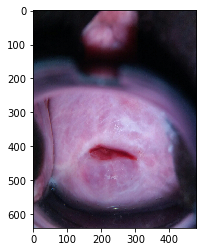

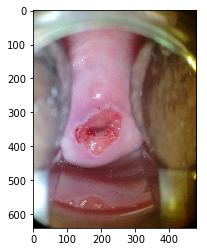

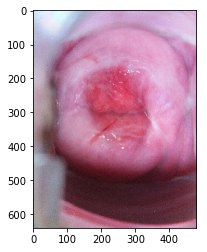

In [16]:
import multiprocessing


def multi_func_resample_img(list_abspath_img):
    multiprocessing_pool = multiprocessing.Pool(max(1, multiprocessing.cpu_count() - 1))
    return multiprocessing_pool.map(sub_func_resample_img, list_abspath_img)

list_img_train = multi_func_resample_img(list_abspath_img_train[0:4])

for resample_img in list_img_train:
    matplotlib.pyplot.imshow(resample_img)
    matplotlib.pyplot.show()